<a href="https://colab.research.google.com/github/harrshat/MachineLearningReferenceDocs/blob/main/Ridge_Lasso_Feature_Selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv('/content/Algerian_fire_cleaned (1).csv')
df.head(3)

,index,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0


In [3]:
df.columns

Index(['index', 'day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain',
       'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [4]:
# Aim: Compute WFI -- Regression
df.drop(['month','day','year'],axis=1,inplace=True)
df.shape


(243, 13)

In [5]:
df.head(3)

,index,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0


In [9]:
df['Classes']=np.where(df['Classes'].str.contains("not fire"),0,1)
df['Classes'].value_counts()

,count
Classes,
1,137
0,106


In [11]:
df.drop(['index'],axis=1,inplace=True)

In [14]:
#Independent and dependent features
df.columns
X= df.drop(['FWI'],axis=1)
y=df['FWI']

In [17]:
# Train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [21]:
X_train.shape # (182, 11)
X_test.shape #(61, 11)

(61, 11)

In [48]:
# Feature Selection based on correlation for independent features
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.656095,-0.305977,-0.317512,0.694768,0.498173,0.390684,0.629848,0.473609,0.542141,0.254549
RH,-0.656095,1.000000,0.225736,0.241656,-0.653023,-0.414601,-0.236078,-0.717804,-0.362317,-0.456876,-0.394665
Ws,-0.305977,0.225736,1.000000,0.251932,-0.190076,0.000379,0.096576,-0.023558,0.035633,-0.082570,-0.199969
Rain,-0.317512,0.241656,0.251932,1.000000,-0.545491,-0.289754,-0.302341,-0.345707,-0.300964,-0.369357,-0.059022
FFMC,0.694768,-0.653023,-0.190076,-0.545491,1.000000,0.620807,0.524101,0.750799,0.607210,0.781259,0.249514
DMC,0.498173,-0.414601,0.000379,-0.289754,0.620807,1.000000,0.868647,0.685656,0.983175,0.617273,0.212582
DC,0.390684,-0.236078,0.096576,-0.302341,0.524101,0.868647,1.000000,0.513701,0.942414,0.543581,-0.060838
ISI,0.629848,-0.717804,-0.023558,-0.345707,0.750799,0.685656,0.513701,1.000000,0.643818,0.742977,0.296441
BUI,0.473609,-0.362317,0.035633,-0.300964,0.607210,0.983175,0.942414,0.643818,1.000000,0.612239,0.114897
Classes,0.542141,-0.456876,-0.082570,-0.369357,0.781259,0.617273,0.543581,0.742977,0.612239,1.000000,0.188837


<Axes: >

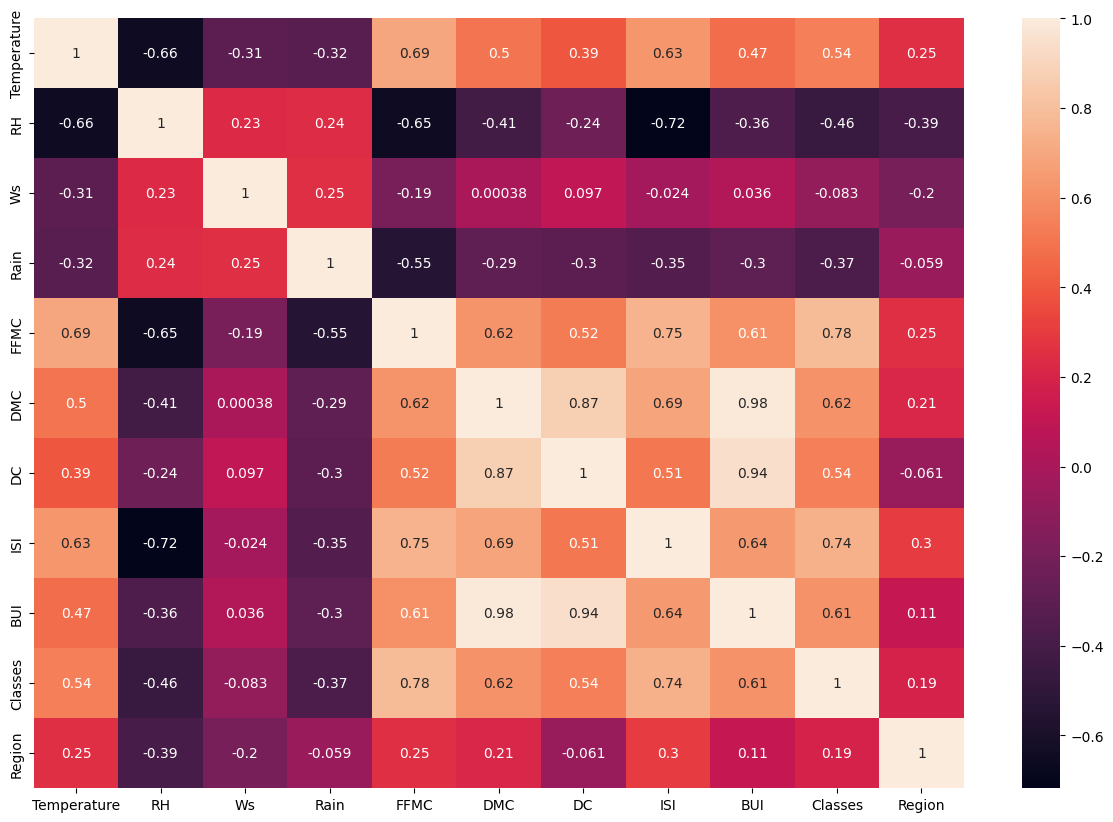

In [33]:
plt.figure(figsize=(15,10))
sns.heatmap(X_train.corr(),annot=True)

In [55]:
# Check for multi collinearity -- correlation between input features
# Using a threshold -- say .95 -- if there is any correlation above 95% then we remove the feature
def correlation(dataset,threshold):
  col_corr=set()
  corr_matrix=dataset.corr()
  for i in range(len(dataset.columns)):
    for j in range(i):
      if abs(corr_matrix.iloc[i,j])>threshold:
        colname=corr_matrix.columns[i]
        col_corr.add(colname)
  return col_corr

#Which ever features are highly correlated, give me the column names


In [60]:
# NOTE: Here, we assume threshold but it is usually set up by domain expert
# correlation(X_train,0.9) -- output: {'BUI'}
corr_features= correlation(X_train,0.85)

In [61]:
# Drop these features - consider .85
X_train.drop(corr_features,axis=1,inplace=True)
X_test.drop(corr_features,axis=1,inplace=True)

In [62]:
X_train.columns

Index(['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'ISI', 'Classes',
       'Region'],
      dtype='object')

# Feature Scaling / Standardization

In [63]:
from sklearn.preprocessing import StandardScaler

In [64]:
scaler=StandardScaler()

In [65]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)


<Axes: title={'center': 'X train after Scaling'}>

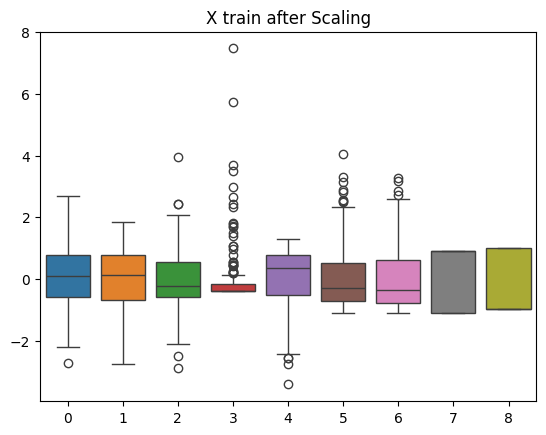

In [69]:
# check for outliers
plt.title("X train after Scaling")
sns.boxplot(X_train)